In [1]:
import pandas as pd

# Pre-EDA

In [2]:
path = "../datasets/production_plant_monitoring/C7-1.csv"
c7_1 = pd.read_csv(path)
c7_1.head()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-99.331815,-79.731577,-49.996189,-56.874058,-55.671430,-57.022951,-55.660953,-57.035192,-65.697449,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.0,-100.0
1,1,-99.331815,-79.731577,-50.087659,-56.874058,-55.617255,-56.970492,-55.498340,-57.087620,-65.697449,...,-97.704794,-76.934022,-84.311211,-93.610953,-25.438393,-97.509680,-65.524273,-100.0,-100.0,-100.0
2,2,-96.142749,-71.343358,-50.118149,-56.978955,-55.603711,-57.140984,-55.538993,-57.048299,-65.697449,...,-97.402793,-71.781622,-84.311211,-93.610953,-23.687395,-97.509680,-71.139518,-100.0,-100.0,-100.0
3,3,-88.883827,-59.724121,-50.102904,-56.874058,-55.671430,-56.983607,-55.593197,-57.035192,-65.697449,...,-90.033974,-57.552610,-84.311211,-85.852824,-12.887859,-89.826133,-68.708337,-100.0,-100.0,-100.0
4,4,-66.985573,-50.316888,-50.148639,-56.992067,-55.590167,-57.062295,-55.674504,-57.035192,-65.697449,...,-68.244616,-45.735041,-84.311211,-65.288078,-10.575512,-67.853618,-67.030037,-100.0,-100.0,-100.0


In [3]:
path = "../datasets/production_plant_monitoring/C7-2.csv"
c7_2 = pd.read_csv(path)
c7_2.head()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-90.584662,-55.088853,-100.0,-100.0,-100.000000,-100.000000,-7.107528,-10.190707,-80.708692,...,-91.226877,-14.401258,-79.90809,-86.922419,-25.932793,-91.192772,-27.911536,-100.0,-100.000000,-3.434675
1,1,-90.584662,-57.189015,-100.0,-100.0,-100.000000,-100.000000,33.288163,7.346484,-80.708692,...,-91.226877,13.697296,-79.90809,-90.730177,-40.579374,-91.192772,-0.211748,-100.0,-100.000000,53.846154
2,2,-90.584662,-57.189015,-100.0,-100.0,-100.000000,-100.000000,33.179755,7.359591,-80.708692,...,-91.226877,13.697296,-79.90809,-84.954364,-30.995236,-91.192772,4.399655,-100.0,-100.000000,53.846154
3,3,-89.430524,-56.207282,-100.0,-100.0,-68.239995,-69.219672,33.206857,7.398912,-80.708692,...,-89.852773,4.770464,-79.90809,-88.648032,-33.034634,-89.719839,-7.442554,-100.0,-76.166604,53.846154
4,4,-89.430524,-54.728470,-100.0,-100.0,11.004266,-14.098361,33.220408,7.307163,-80.708692,...,-90.064174,35.205572,-79.90809,-88.391329,-31.850135,-89.977982,27.958591,-100.0,33.333333,53.846154


In [4]:
len(c7_1.columns), len(c7_2.columns)

(26, 26)

# Performing PCA and t-SNE on the dataset to visualize the data in 2D and 3D space respectively.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../datasets/production_plant_monitoring/C7-1.csv")

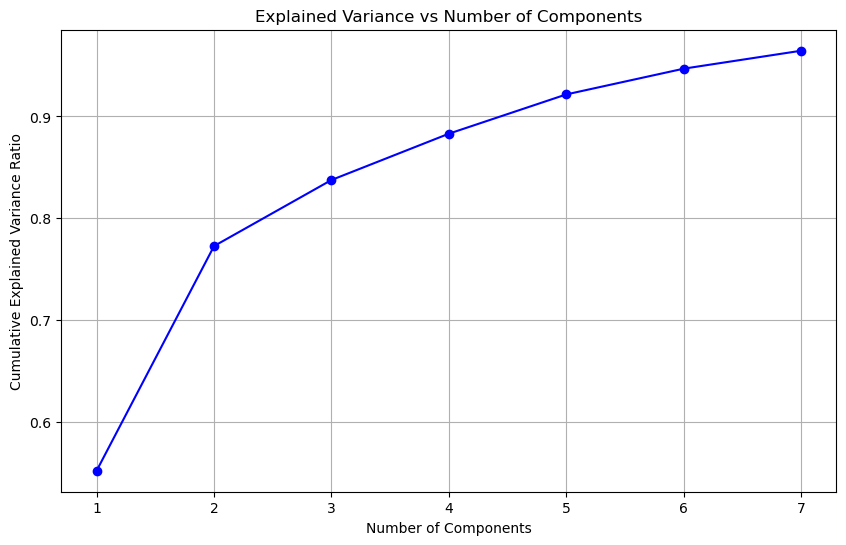

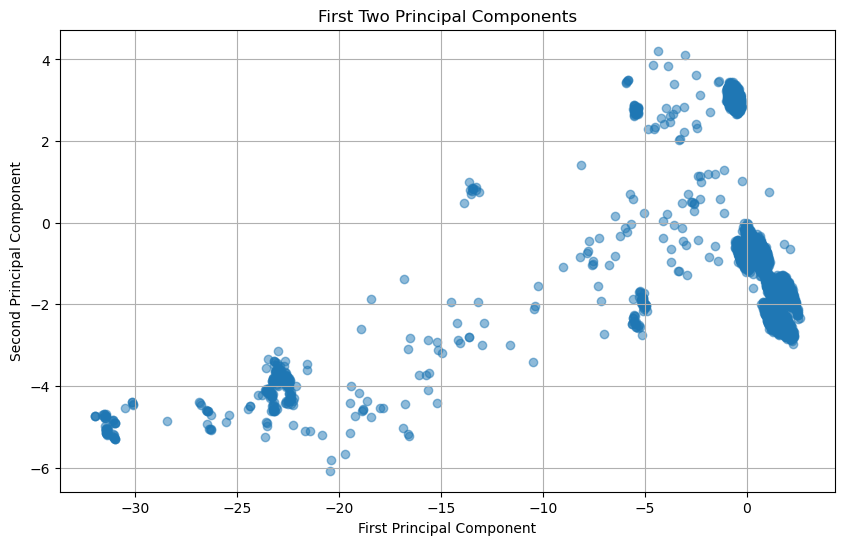


Top features in PC1:
A_2: 0.251
B_2: 0.249
B_1: 0.245
C_1: 0.244
C_3: 0.241

Top features in PC2:
L_3: 0.408
L_6: 0.401
L_5: -0.378
L_4: -0.373
A_3: 0.297


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'

# 1. Prepare the data
# Remove Timestamp column as it's not a feature for PCA
features = df.drop('Timestamp', axis=1)

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Apply PCA
# Start with number of components that explain 95% of variance
pca = PCA(n_components=0.95)  # This will automatically select components explaining 95% of variance
pca_transformed = pca.fit_transform(scaled_features)

# 4. Analyze variance explained
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 5. Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# 6. Plot first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.grid(True)
plt.show()

# 7. Get feature importance
components_df = pd.DataFrame(
    pca.components_,
    columns=features.columns
)

# Print the most important features for first two components
for i in range(2):
    print(f"\nTop features in PC{i+1}:")
    sorted_idx = np.argsort(np.abs(components_df.iloc[i]))[::-1]
    for idx in sorted_idx[:5]:  # Show top 5 features
        print(f"{components_df.columns[idx]}: {components_df.iloc[i, idx]:.3f}")

/home/shankerabhigyan/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/shankerabhigyan/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/shankerabhigyan/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


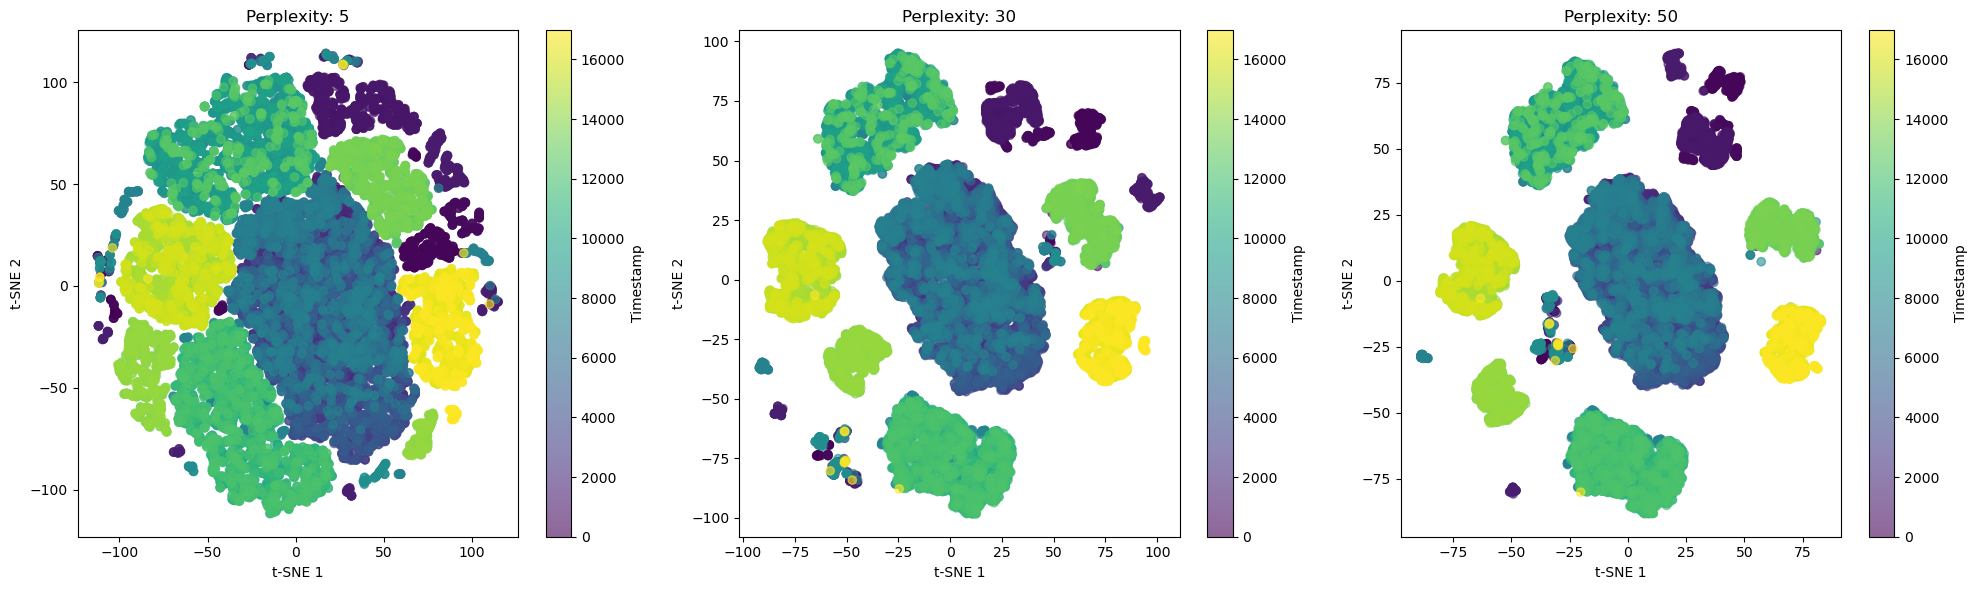

/home/shankerabhigyan/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


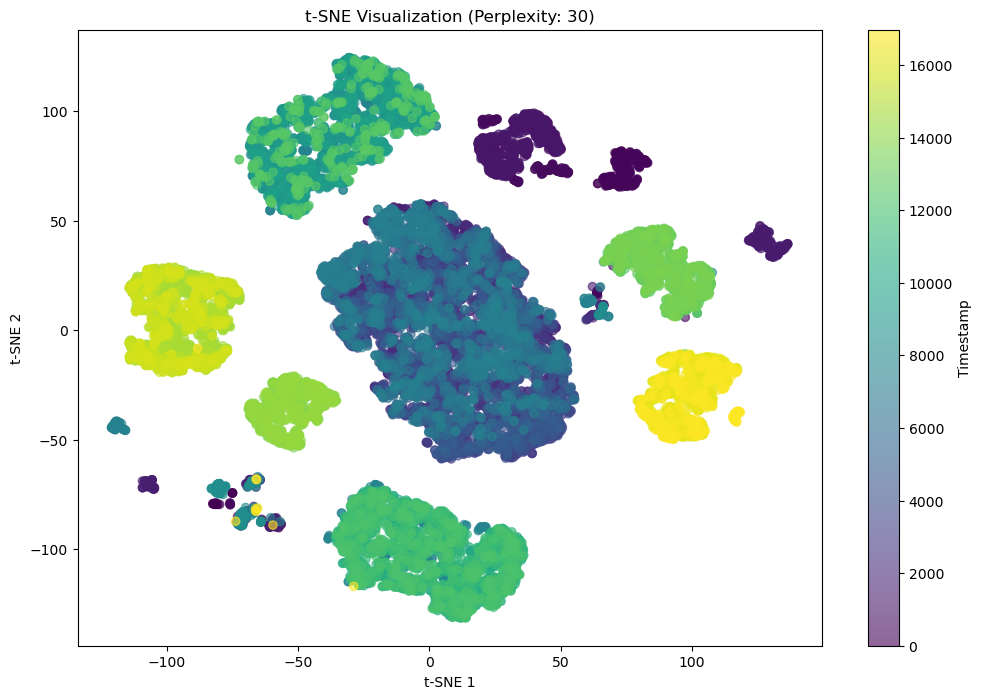

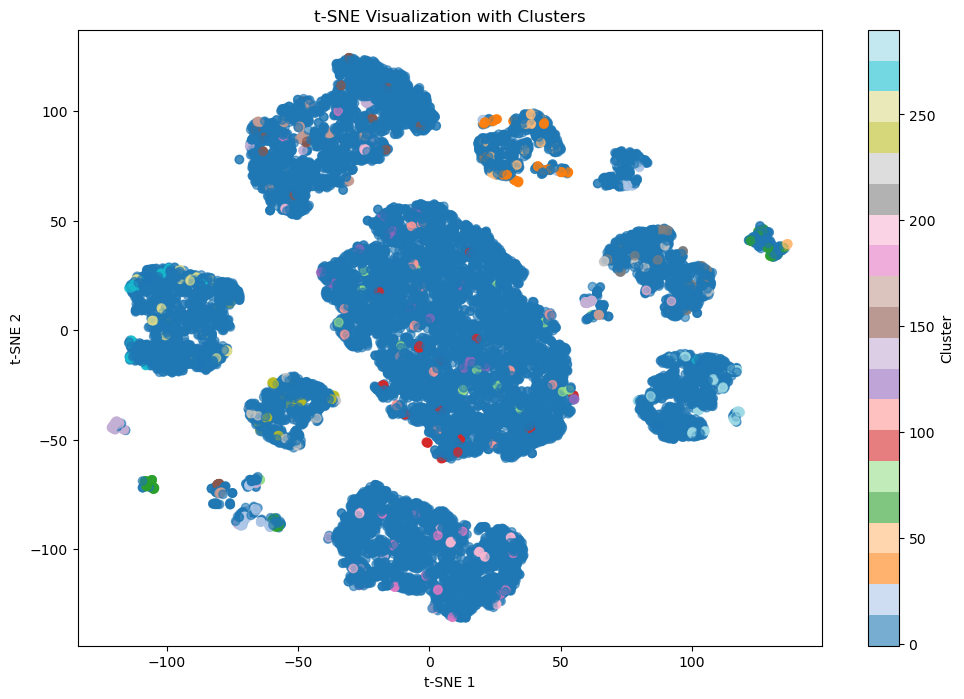


Number of clusters: 291

Points per cluster:
Cluster 0: 11 points
Cluster 1: 10 points
Cluster 2: 9 points
Cluster 3: 11 points
Cluster 4: 12 points
Cluster 5: 13 points
Cluster 6: 6 points
Cluster 7: 5 points
Cluster 8: 5 points
Cluster 9: 7 points
Cluster 10: 17 points
Cluster 11: 7 points
Cluster 12: 7 points
Cluster 13: 5 points
Cluster 14: 8 points
Cluster 15: 5 points
Cluster 16: 5 points
Cluster 17: 5 points
Cluster 18: 6 points
Cluster 19: 5 points
Cluster 20: 25 points
Cluster 21: 12 points
Cluster 22: 10 points
Cluster 23: 5 points
Cluster 24: 12 points
Cluster 25: 6 points
Cluster 26: 7 points
Cluster 27: 7 points
Cluster 28: 6 points
Cluster 29: 6 points
Cluster 30: 5 points
Cluster 31: 8 points
Cluster 32: 5 points
Cluster 33: 8 points
Cluster 34: 10 points
Cluster 35: 7 points
Cluster 36: 10 points
Cluster 37: 5 points
Cluster 38: 5 points
Cluster 39: 10 points
Cluster 40: 5 points
Cluster 41: 13 points
Cluster 42: 5 points
Cluster 43: 10 points
Cluster 44: 7 points
Clus

In [14]:
# tsne
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
features = df.drop('Timestamp', axis=1)

# 2. Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Apply t-SNE with different parameters
# Using multiple perplexity values to find the best visualization
perplexity_values = [5, 30, 50]  # Try different values
n_iter = 1000  # Increase iterations for better convergence

fig, axes = plt.subplots(1, len(perplexity_values), figsize=(20, 6))
for i, perp in enumerate(perplexity_values):
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        n_iter=n_iter,
        random_state=42,
        learning_rate='auto',
        init='random'
    )
    
    tsne_results = tsne.fit_transform(scaled_features)
    
    # Color points by timestamp for temporal patterns
    scatter = axes[i].scatter(
        tsne_results[:, 0],
        tsne_results[:, 1],
        c=df['Timestamp'],
        cmap='viridis',
        alpha=0.6
    )
    axes[i].set_title(f'Perplexity: {perp}')
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')
    plt.colorbar(scatter, ax=axes[i], label='Timestamp')

plt.tight_layout()
plt.show()

# For the best perplexity value (after visual inspection), create a more detailed plot
best_perp = 30  # Adjust based on previous results

tsne = TSNE(
    n_components=2,
    perplexity=best_perp,
    n_iter=2000,  # Increased iterations
    random_state=42,
    learning_rate='auto',
    init='random'
)

tsne_results = tsne.fit_transform(scaled_features)

# Create a more detailed visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    c=df['Timestamp'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Timestamp')
plt.title(f't-SNE Visualization (Perplexity: {best_perp})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Optional: Analyze clusters if they appear
from sklearn.cluster import DBSCAN

# Apply DBSCAN to t-SNE results
clustering = DBSCAN(eps=0.5, min_samples=5).fit(tsne_results)
labels = clustering.labels_

# Plot with cluster colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    c=labels,
    cmap='tab20',
    alpha=0.6
)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization with Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Print cluster statistics
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"\nNumber of clusters: {n_clusters}")
print("\nPoints per cluster:")
for i in range(n_clusters):
    print(f"Cluster {i}: {sum(labels == i)} points")
print(f"Noise points: {sum(labels == -1)}")